In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import time
import threading
from NLTK_utils import Twitter_Scraper, concat_and_save_to_csv
from NLTK_utils import preprocess_text_column
from NLTK_utils import apply_vader
from NLTK_utils import train_and_evaluate
from NLTK_utils import plot_sentiment_timeseries
from NLTK_utils import final_corr

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vishwa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
USER_UNAME = '@MBean1xy'
USER_PASSWORD = 'MRqpwo1029'

scraper = Twitter_Scraper(
    username=USER_UNAME,
    password=USER_PASSWORD,
)

scraper.login()

stop_event = threading.Event()
# Background function
def background_task():
    while not stop_event.is_set():
        scraper.scrape_tweets(
        scrape_query="Bitcoin",
        scrape_latest=True,
        )
        concat_and_save_to_csv(scraper.get_tweets(), poster_details=scraper.scraper_details["poster_details"])
        time.sleep(300)

# Background thread
thread = threading.Thread(target=background_task)
thread.start()

Initializing Twitter Scraper...
Setup WebDriver...
Initializing ChromeDriver...
Initializing ChromeDriver...
WebDriver Setup Complete

Logging in to Twitter...

Login Successful



Scraping Latest Tweets from Bitcoin search...
Progress: [[========================================]] 100.00% 100 of 100
Scraping Complete
Tweets: 100 out of 100



In [ ]:
# Stop threading execution
#stop_event.set()
#scraper.driver.close() 

Saved 100 new tweets. All tweets 3513


### Data Reading

In [4]:
# Load the extracted CSV file
df = pd.read_csv("tweets/all_tweets.csv")
df.head()

Progress: [[====------------------------------------]] 10.00% 10 of 100

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,Mentions,Emojis,Profile Image,Tweet Link,Tweet ID,Bitcoin_Price,UnitTime,cleaned_text,tokens
0,Theo Von,@TheoVon,2025-05-16T14:07:05.000Z,1.0,My job only exists bc the armed forces protect...,0.0,0.0,0.0,374K,[],"['@usairforce', '@USAFCENT', '@VisitQatar']","['\\U0001fae1', '\\U0001f1fa\\U0001f1f8', '\\U...",https://pbs.twimg.com/profile_images/149411355...,https://x.com/TheoVon/status/1923379683678118113,tweet_id:1923379683678118113,102940,2025-05-17 13:06:47.299533,My job only exists bc the armed forces protect...,"['job', 'exists', 'bc', 'armed', 'force', 'pro..."
1,Earth,@earthcurated,2025-05-17T16:34:00.000Z,1.0,— alone can be beautiful,0.0,0.0,0.0,7.1K,[],[],[],https://pbs.twimg.com/profile_images/159096605...,https://x.com/earthcurated/status/192377904203...,tweet_id:1923779042035237238,102940,2025-05-17 13:06:47.299533,— alone can be beautiful,"['alone', 'beautiful']"
2,DiscussingFilm,@DiscussingFilm,2025-05-17T00:33:54.000Z,1.0,The Department of Homeland Security is conside...,0.0,0.0,0.0,8.5M,[],[],[],https://pbs.twimg.com/profile_images/170642939...,https://x.com/DiscussingFilm/status/1923537424...,tweet_id:1923537424539427290,102940,2025-05-17 13:06:47.299533,The Department of Homeland Security is conside...,"['department', 'homeland', 'security', 'consid..."
3,philip lewis,@Phil_Lewis_,2025-05-16T11:53:33.000Z,1.0,"The Nottoway Plantation, the “largest remainin...",0.0,0.0,0.0,8.4M,[],[],[],https://pbs.twimg.com/profile_images/162077193...,https://x.com/Phil_Lewis_/status/1923346075970...,tweet_id:1923346075970064723,102940,2025-05-17 13:06:47.299533,"The Nottoway Plantation, the “largest remainin...","['nottoway', 'plantation', 'largest', 'remaini..."
4,Séamus Malekafzali,@Seamus_Malek,2025-05-15T23:28:06.000Z,1.0,Got this promo for a 60 Minutes story coming o...,0.0,0.0,0.0,1.8M,[],[],[],https://pbs.twimg.com/profile_images/190794667...,https://x.com/Seamus_Malek/status/192315847763...,tweet_id:1923158477632839938,102940,2025-05-17 13:06:47.299533,Got this promo for a 60 Minutes story coming o...,"['got', 'promo', '60', 'minute', 'story', 'com..."


Progress: [[========================================]] 100.00% 100 of 100
Scraping Complete
Tweets: 100 out of 100



In [5]:
df.shape

Saved 100 new tweets. All tweets 3413


(3313, 19)

In [6]:
# Apply VADER sentiment analysis and save result to 'sentiment_labeled.csv'
df = apply_vader(df)

In [7]:
df.tail()

,Name,Handle,Timestamp,Verified,Content,Comments,Retweets,Likes,Analytics,Tags,...,Tweet ID,Bitcoin_Price,UnitTime,cleaned_text,tokens,compound,positive,neutral,negative,sentiment_label
3308,TheCardClub,@THECARDCLUBtc,2025-05-17T20:28:06.000Z,1.0,I can’t sell bitcoin without being verified no...,0.0,0.0,0.0,7,[],...,tweet_id:1923837956357308797,103153,2025-05-17 16:30:49.402518,I can’t sell bitcoin without being verified no...,"['cant', 'sell', 'bitcoin', 'without', 'verifi...",0.0000,0.000,1.000,0.000,neutral
3309,₿itcoin ₿ombadil,@BitcoinBombadil,2025-05-17T20:28:06.000Z,1.0,Ethereum’s database is way bigger than Bitcoin...,0.0,0.0,0.0,13,[],...,tweet_id:1923837956202045740,103153,2025-05-17 16:30:49.402518,Ethereum’s database is way bigger than Bitcoin...,"['ethereums', 'database', 'way', 'bigger', 'bi...",0.0000,0.000,1.000,0.000,neutral
3310,ツArslan,@arslan_Rx,2025-05-17T20:28:06.000Z,0.0,"#ETH, #ETHFI, #PEOPLE, #BabyDoge, #GST #bitcoi...",0.0,0.0,0.0,22,"['#ETH', '#ETHFI', '#PEOPLE', '#BabyDoge', '#G...",...,tweet_id:1923837955623326032,103153,2025-05-17 16:30:49.402518,"#ETH, #ETHFI, #PEOPLE, #BabyDoge, #GST #bitcoi...",[],0.0000,0.000,1.000,0.000,neutral
3311,Reformed,@ProfessorBigz,2025-05-17T20:28:06.000Z,0.0,dictatorship. The code doesn’t bend and change...,0.0,0.0,0.0,9,[],...,tweet_id:1923837955082215557,103153,2025-05-17 16:30:49.402518,dictatorship. The code doesn’t bend and change...,"['dictatorship', 'code', 'doesnt', 'bend', 'ch...",0.7717,0.140,0.860,0.000,positive
3312,Reformed,@ProfessorBigz,2025-05-17T20:28:05.000Z,0.0,Bitcoin is not a democracy. Democracies are mo...,0.0,0.0,0.0,12,[],...,tweet_id:1923837951592505826,103153,2025-05-17 16:30:49.402518,Bitcoin is not a democracy. Democracies are mo...,"['bitcoin', 'democracy', 'democracy', 'mob', '...",-0.4144,0.076,0.808,0.116,negative


In [8]:
# Train and evaluate classifier using sentiment labels
train_and_evaluate(df)

Model Evaluation
Accuracy: 0.6817496229260935
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.22      0.34       123
     neutral       0.69      0.84      0.75       274
    positive       0.67      0.74      0.70       266

    accuracy                           0.68       663
   macro avg       0.70      0.60      0.60       663
weighted avg       0.69      0.68      0.66       663



In [9]:
df = df.groupby(['UnitTime']).agg({'Bitcoin_Price':'max','compound':'mean'}).reset_index()
df['Time'] = pd.to_datetime(df['UnitTime'], errors='coerce')
df = df.sort_values(by=['Time'])
df.head()

,UnitTime,Bitcoin_Price,compound,Time
0,2025-05-17 13:06:47.299533,102940,-0.142756,2025-05-17 13:06:47.299533
1,2025-05-17 13:13:15.412837,102999,0.199127,2025-05-17 13:13:15.412837
2,2025-05-17 13:19:35.820168,103044,0.161316,2025-05-17 13:19:35.820168
3,2025-05-17 13:25:45.103574,103075,0.157428,2025-05-17 13:25:45.103574
4,2025-05-17 13:31:43.948541,103194,0.189115,2025-05-17 13:31:43.948541


In [10]:
df.tail(10)

,UnitTime,Bitcoin_Price,compound,Time
24,2025-05-17 15:33:40.007985,103124,0.115141,2025-05-17 15:33:40.007985
25,2025-05-17 15:40:03.637793,103117,0.105985,2025-05-17 15:40:03.637793
26,2025-05-17 15:51:34.368582,103144,0.133100,2025-05-17 15:51:34.368582
27,2025-05-17 15:56:52.518420,103155,0.149277,2025-05-17 15:56:52.518420
28,2025-05-17 16:03:00.286090,103180,0.135237,2025-05-17 16:03:00.286090
29,2025-05-17 16:08:31.125827,103190,0.135996,2025-05-17 16:08:31.125827
30,2025-05-17 16:14:04.558718,103173,0.077383,2025-05-17 16:14:04.558718
31,2025-05-17 16:19:38.520667,103165,0.111719,2025-05-17 16:19:38.520667
32,2025-05-17 16:25:07.324350,103164,0.172477,2025-05-17 16:25:07.324350
33,2025-05-17 16:30:49.402518,103153,0.091352,2025-05-17 16:30:49.402518


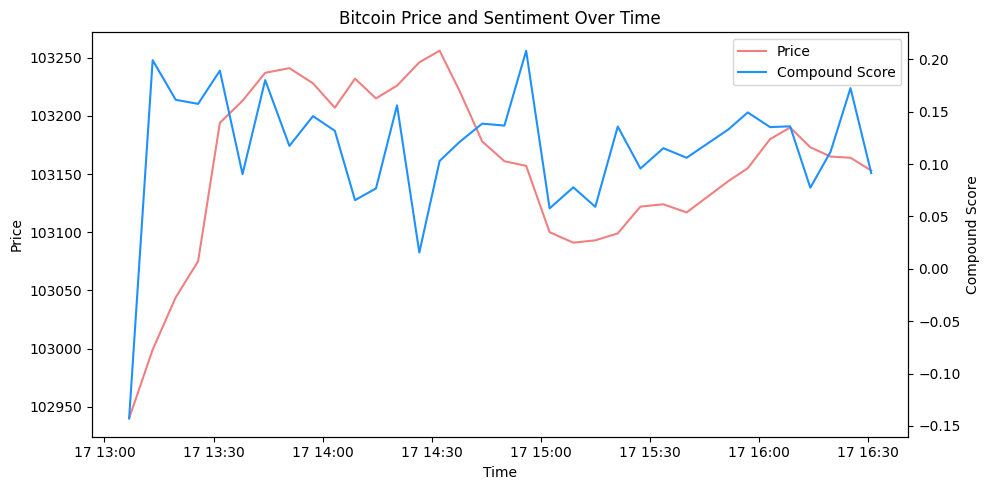

In [11]:
plot_sentiment_timeseries(df)

(34, 7)
                     UnitTime  Bitcoin_Price  compound  \
0  2025-05-17 13:06:47.299533         102940 -0.142756   
1  2025-05-17 13:13:15.412837         102999  0.199127   
2  2025-05-17 13:19:35.820168         103044  0.161316   
3  2025-05-17 13:25:45.103574         103075  0.157428   
4  2025-05-17 13:31:43.948541         103194  0.189115   

                        Time Sentiment  Bitcoin_Price_Diff Movement  
0 2025-05-17 13:06:47.299533  negative                 NaN   stable  
1 2025-05-17 13:13:15.412837  positive            0.000573       up  
2 2025-05-17 13:19:35.820168  positive            0.000437       up  
3 2025-05-17 13:25:45.103574  positive            0.000301       up  
4 2025-05-17 13:31:43.948541  positive            0.001154       up  


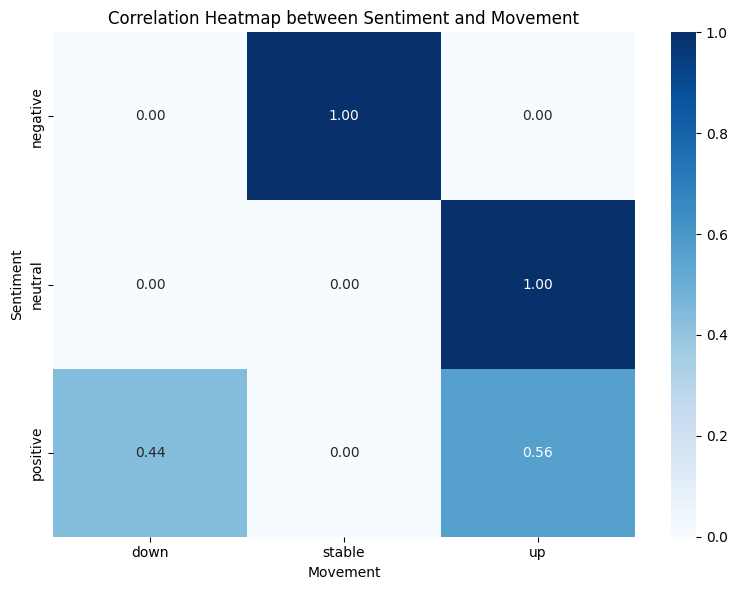

In [12]:
final_corr(df)